### import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings

import sklearn
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model.coordinate_descent import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

In [66]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False
## 拦截异常
warnings.filterwarnings(action = 'ignore', category=ConvergenceWarning)

In [67]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=False, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=False, compact_ints=False, use_unsigned=False, low_memory=True, buffer_lines=None, memory_map=False, float_precision=No

In [68]:
pd.read_csv("datas/crx.data", header=None)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+


In [69]:
### 加载数据并对数据进行预处理
# 1. 加载数据
path = "datas/crx.data"
names = ['A1','A2','A3','A4','A5','A6','A7','A8',
         'A9','A10','A11','A12','A13','A14','A15','A16']
df = pd.read_csv(path, header=None, names=names)
print ("数据条数:", len(df))

# 2. 异常数据过滤
df = df.replace("?", np.nan).dropna(how='any')
print ("过滤后数据条数:", len(df))
df.head(5)

数据条数: 690
过滤后数据条数: 653


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [70]:
df.info() # 看一下各个列的字符相关信息

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 689
Data columns (total 16 columns):
A1     653 non-null object
A2     653 non-null object
A3     653 non-null float64
A4     653 non-null object
A5     653 non-null object
A6     653 non-null object
A7     653 non-null object
A8     653 non-null float64
A9     653 non-null object
A10    653 non-null object
A11    653 non-null int64
A12    653 non-null object
A13    653 non-null object
A14    653 non-null object
A15    653 non-null int64
A16    653 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.7+ KB


In [3]:
# TODO: 有没有其它便捷的代码一次性查看所有的数据类型为object的取值信息
df.A16.value_counts()

NameError: name 'df' is not defined

In [72]:
# 自定义的一个哑编码实现方式：将v变量转换成为一个向量/list集合的形式
def parse(v, l):
    # v是一个字符串，需要进行转换的数据
    # l是一个类别信息，其中v是其中的一个值
    return [1 if i == v else 0 for i in l]
# 定义一个处理每条数据的函数
def parseRecord(record):
    result = []
    ## 格式化数据，将离散数据转换为连续数据
    a1 = record['A1']
    for i in parse(a1, ('a', 'b')):
        result.append(i)
    
    result.append(float(record['A2']))
    result.append(float(record['A3']))
    
    # 将A4的信息转换为哑编码的形式; 对于DataFrame中，原来一列的数据现在需要四列来进行表示
    a4 = record['A4']
    for i in parse(a4, ('u', 'y', 'l', 't')):
        result.append(i)
    
    a5 = record['A5']
    for i in parse(a5, ('g', 'p', 'gg')):
        result.append(i)
    
    a6 = record['A6']
    for i in parse(a6, ('c', 'd', 'cc', 'i', 'j', 'k', 'm', 'r', 'q', 'w', 'x', 'e', 'aa', 'ff')):
        result.append(i)
    
    a7 = record['A7']
    for i in parse(a7, ('v', 'h', 'bb', 'j', 'n', 'z', 'dd', 'ff', 'o')):
        result.append(i)
    
    result.append(float(record['A8']))
    
    a9 = record['A9']
    for i in parse(a9, ('t', 'f')):
        result.append(i)
        
    a10 = record['A10']
    for i in parse(a10, ('t', 'f')):
        result.append(i)
    
    result.append(float(record['A11']))
    
    a12 = record['A12']
    for i in parse(a12, ('t', 'f')):
        result.append(i)
        
    a13 = record['A13']
    for i in parse(a13, ('g', 'p', 's')):
        result.append(i)
    
    result.append(float(record['A14']))
    result.append(float(record['A15']))
    
    a16 = record['A16']
    if a16 == '+':
        result.append(1)
    else:
        result.append(0)
        
    return result

In [73]:
# 哑编码实验
print(parse('v', ['v', 'y', 'l']))
print(parse('y', ['v', 'y', 'l']))
print(parse('l', ['v', 'y', 'l']))

[1, 0, 0]
[0, 1, 0]
[0, 0, 1]


In [74]:
### 数据特征处理(将数据转换为数值类型的)
new_names =  ['A1_0', 'A1_1',
              'A2','A3',
              'A4_0','A4_1','A4_2','A4_3', # 因为需要对A4进行哑编码操作，需要使用四列来表示一列的值
              'A5_0', 'A5_1', 'A5_2', 
              'A6_0', 'A6_1', 'A6_2', 'A6_3', 'A6_4', 'A6_5', 'A6_6', 'A6_7', 'A6_8', 'A6_9', 'A6_10', 'A6_11', 'A6_12', 'A6_13', 
              'A7_0', 'A7_1', 'A7_2', 'A7_3', 'A7_4', 'A7_5', 'A7_6', 'A7_7', 'A7_8', 
              'A8',
              'A9_0', 'A9_1' ,
              'A10_0', 'A10_1',
              'A11',
              'A12_0', 'A12_1',
              'A13_0', 'A13_1', 'A13_2',
              'A14','A15','A16']
datas = df.apply(lambda x: pd.Series(parseRecord(x), index = new_names), axis=1)
names = new_names

## 展示一下处理后的数据
datas.head(5)

,A1_0,A1_1,A2,A3,A4_0,A4_1,A4_2,A4_3,A5_0,A5_1,...,A10_1,A11,A12_0,A12_1,A13_0,A13_1,A13_2,A14,A15,A16
0,0.0,1.0,30.83,0.000,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,202.0,0.0,1.0
1,1.0,0.0,58.67,4.460,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,6.0,0.0,1.0,1.0,0.0,0.0,43.0,560.0,1.0
2,1.0,0.0,24.50,0.500,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,280.0,824.0,1.0
3,0.0,1.0,27.83,1.540,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,5.0,1.0,0.0,1.0,0.0,0.0,100.0,3.0,1.0
4,0.0,1.0,20.17,5.625,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,120.0,0.0,1.0


In [75]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 689
Data columns (total 48 columns):
A1_0     653 non-null float64
A1_1     653 non-null float64
A2       653 non-null float64
A3       653 non-null float64
A4_0     653 non-null float64
A4_1     653 non-null float64
A4_2     653 non-null float64
A4_3     653 non-null float64
A5_0     653 non-null float64
A5_1     653 non-null float64
A5_2     653 non-null float64
A6_0     653 non-null float64
A6_1     653 non-null float64
A6_2     653 non-null float64
A6_3     653 non-null float64
A6_4     653 non-null float64
A6_5     653 non-null float64
A6_6     653 non-null float64
A6_7     653 non-null float64
A6_8     653 non-null float64
A6_9     653 non-null float64
A6_10    653 non-null float64
A6_11    653 non-null float64
A6_12    653 non-null float64
A6_13    653 non-null float64
A7_0     653 non-null float64
A7_1     653 non-null float64
A7_2     653 non-null float64
A7_3     653 non-null float64
A7_4     653 non-null flo

In [76]:
## 数据分割
X = datas[names[0:-1]]
Y = datas[names[-1]]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=0)

In [77]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
A1_0,587.0,0.315162,0.464977,0.00,0.000,0.00,1.000,1.00
A1_1,587.0,0.684838,0.464977,0.00,0.000,1.00,1.000,1.00
A2,587.0,31.685417,11.883506,13.75,22.625,28.67,38.290,76.75
A3,587.0,4.909319,5.073588,0.00,1.040,3.00,7.520,28.00
A4_0,587.0,0.761499,0.426530,0.00,1.000,1.00,1.000,1.00
A4_1,587.0,0.235094,0.424419,0.00,0.000,0.00,0.000,1.00
A4_2,587.0,0.003407,0.058321,0.00,0.000,0.00,0.000,1.00
A4_3,587.0,0.000000,0.000000,0.00,0.000,0.00,0.000,0.00
A5_0,587.0,0.761499,0.426530,0.00,1.000,1.00,1.000,1.00
A5_1,587.0,0.235094,0.424419,0.00,0.000,0.00,0.000,1.00


In [78]:
## 数据正则化操作(归一化)
ss = StandardScaler()
## 模型训练一定是在训练集合上训练的
X_train = ss.fit_transform(X_train) ## 训练正则化模型，并将训练数据归一化操作
X_test = ss.transform(X_test) ## 使用训练好的模型对测试数据进行归一化操作

In [79]:
pd.DataFrame(X_train).describe().T

,count,mean,std,min,25%,50%,75%,max
0,587.0,-5.636226e-17,1.000853,-0.678380,-0.678380,-0.678380,1.474101,1.474101
1,587.0,5.636226e-17,1.000853,-1.474101,-1.474101,0.678380,0.678380,0.678380
2,587.0,6.639588e-16,1.000853,-1.510557,-0.763087,-0.253965,0.556251,3.795430
3,587.0,2.175054e-16,1.000853,-0.968448,-0.763290,-0.376646,0.515002,4.555036
4,587.0,3.782702e-17,1.000853,-1.786857,0.559642,0.559642,0.559642,0.559642
5,587.0,1.059157e-17,1.000853,-0.554391,-0.554391,-0.554391,-0.554391,1.803780
6,587.0,2.240069e-16,1.000853,-0.058471,-0.058471,-0.058471,-0.058471,17.102631
7,587.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,587.0,3.782702e-17,1.000853,-1.786857,0.559642,0.559642,0.559642,0.559642
9,587.0,1.059157e-17,1.000853,-0.554391,-0.554391,-0.554391,-0.554391,1.803780


In [80]:
## Logistic算法模型构建
# LogisticRegression中，参数说明：
# penalty => 惩罚项方式，即使用何种方式进行正则化操作(可选: l1或者l2)
# C => 惩罚项系数，即L1或者L2正则化项中给定的那个λ系数(ppt上)
# LogisticRegressionCV中，参数说明：
# LogisticRegressionCV表示LogisticRegression进行交叉验证选择超参数(惩罚项系数C/λ)
# Cs => 表示惩罚项系数的可选范围
lr = LogisticRegressionCV(Cs=np.logspace(-4,1,50), fit_intercept=True, penalty='l2', solver='lbfgs', tol=0.01, multi_class='ovr')
lr.fit(X_train, Y_train)

LogisticRegressionCV(Cs=array([1.00000e-04, 1.26486e-04, 1.59986e-04, 2.02359e-04, 2.55955e-04,
       3.23746e-04, 4.09492e-04, 5.17947e-04, 6.55129e-04, 8.28643e-04,
       1.04811e-03, 1.32571e-03, 1.67683e-03, 2.12095e-03, 2.68270e-03,
       3.39322e-03, 4.29193e-03, 5.42868e-03, 6.86649e-03, 8.68511e-03,
       1...., 2.44205e+00, 3.08884e+00,
       3.90694e+00, 4.94171e+00, 6.25055e+00, 7.90604e+00, 1.00000e+01]),
           class_weight=None, cv=None, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=100, multi_class='ovr',
           n_jobs=1, penalty='l2', random_state=None, refit=True,
           scoring=None, solver='lbfgs', tol=0.01, verbose=0)

In [81]:
## Logistic算法效果输出
lr_r = lr.score(X_train, Y_train)
print ("Logistic算法R值（训练集上的准确率）：", lr_r)
print ("Logistic算法稀疏化特征比率：%.2f%%" % (np.mean(lr.coef_.ravel() == 0) * 100))
print ("Logistic算法参数：",lr.coef_)
print ("Logistic算法截距：",lr.intercept_)

Logistic算法R值（训练集上的准确率）： 0.8909710391822828
Logistic算法稀疏化特征比率：2.13%
Logistic算法参数： [[-0.00507672  0.00507672  0.06367298  0.06284643  0.03997945 -0.04935683
   0.06679464  0.          0.03997945 -0.04935683  0.06679464  0.00549457
  -0.02646873  0.1057865  -0.10294239 -0.02346199 -0.05981958 -0.0131902
   0.01148842  0.04690591  0.03631018  0.13996153  0.03858644 -0.02422956
  -0.11817039 -0.00441403  0.08130739 -0.02489682  0.03130081  0.03567533
  -0.01396069 -0.00769375 -0.10417126 -0.00379776  0.15834772  0.46892613
  -0.46892613  0.16546747 -0.16546747  0.19117654 -0.01273762  0.01273762
   0.01240825 -0.00744574 -0.0110668  -0.08907636  0.12989149]]
Logistic算法截距： [-0.25992008]


In [82]:
## Logistic算法预测（预测所属类别）
lr_y_predict = lr.predict(X_test)
lr_y_predict

array([1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1.])

In [83]:
## Logistic算法获取概率值(就是Logistic算法计算出来的结果值)
y1 = lr.predict_proba(X_test)
y1

array([[0.22855228, 0.77144772],
       [0.18260146, 0.81739854],
       [0.15724948, 0.84275052],
       [0.8701438 , 0.1298562 ],
       [0.47949865, 0.52050135],
       [0.05541409, 0.94458591],
       [0.75895994, 0.24104006],
       [0.21888948, 0.78111052],
       [0.88715054, 0.11284946],
       [0.34023558, 0.65976442],
       [0.05851845, 0.94148155],
       [0.91466856, 0.08533144],
       [0.85372992, 0.14627008],
       [0.16044605, 0.83955395],
       [0.46888191, 0.53111809],
       [0.85338146, 0.14661854],
       [0.14325521, 0.85674479],
       [0.55315686, 0.44684314],
       [0.93684193, 0.06315807],
       [0.19932811, 0.80067189],
       [0.9559255 , 0.0440745 ],
       [0.89619766, 0.10380234],
       [0.87028753, 0.12971247],
       [0.77272228, 0.22727772],
       [0.81332938, 0.18667062],
       [0.69657062, 0.30342938],
       [0.81158919, 0.18841081],
       [0.46436477, 0.53563523],
       [0.25327843, 0.74672157],
       [0.85623504, 0.14376496],
       [0.

In [96]:
## KNN算法构建
# 参数介绍
# n_neighbors: 选取几个邻居
# weights：邻居的权重是平均呢，还是越重话语权越大呢
# algorithm：
    # - ‘ball_tree’ will use BallTree
    # - ‘kd_tree’ will use KDTree
    # - ‘brute’ will use a brute-force search.
    # - ‘auto‘默认选项，是看哪个好用那个 
knn = KNeighborsClassifier(n_neighbors=20, algorithm='kd_tree', weights='distance')
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='distance')

In [97]:
## KNN算法效果输出
knn_r = knn.score(X_train, Y_train)
print("Logistic算法训练上R值（准确率）：%.2f" % knn_r)

Logistic算法训练上R值（准确率）：1.00


In [98]:
## KNN算法预测
knn_y_predict = knn.predict(X_test)
knn_r_test = knn.score(X_test, Y_test)
print("Logistic算法训练上R值（测试集上准确率）：%.2f" % knn_r_test)

Logistic算法训练上R值（测试集上准确率）：0.83


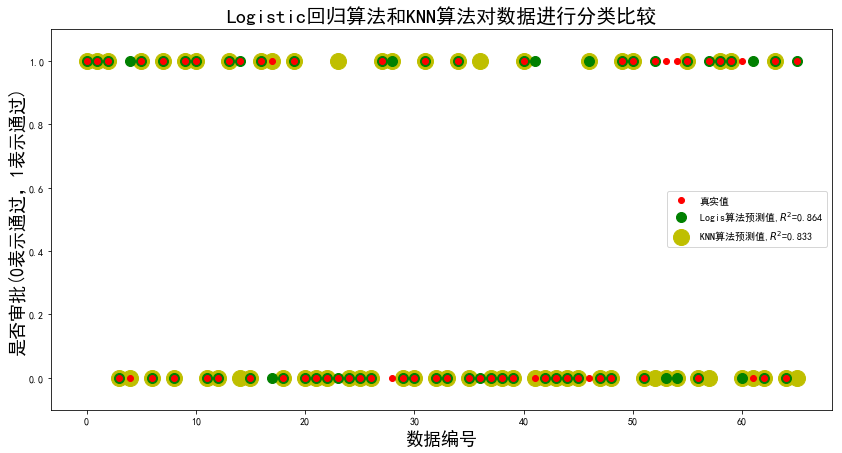

In [92]:
## 结果图像展示
## c. 图表展示
x_len = range(len(X_test))
plt.figure(figsize=(14,7), facecolor='w')
plt.ylim(-0.1,1.1)
plt.plot(x_len, Y_test, 'ro',markersize = 6, zorder=3, label=u'真实值')
plt.plot(x_len, lr_y_predict, 'go', markersize = 10, zorder=2, label=u'Logis算法预测值,$R^2$=%.3f' % lr.score(X_test, Y_test))
plt.plot(x_len, knn_y_predict, 'yo', markersize = 16, zorder=1, label=u'KNN算法预测值,$R^2$=%.3f' % knn.score(X_test, Y_test))
plt.legend(loc = 'center right')
plt.xlabel(u'数据编号', fontsize=18)
plt.ylabel(u'是否审批(0表示通过，1表示通过)', fontsize=18)
plt.title(u'Logistic回归算法和KNN算法对数据进行分类比较', fontsize=20)
plt.show()